In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def manual_roc_curve(y_test, y_pred_prob):
    fpr_list = []
    tpr_list = []
    
    # Obtener los umbrales únicos de las probabilidades predichas
    thresholds = np.sort(np.unique(y_pred_prob))[::-1]

    # Calcular FPR y TPR para cada umbral
    for threshold in thresholds:
        # Convertir probabilidades a etiquetas con el umbral actual
        y_pred = (y_pred_prob >= threshold).astype(int)

        # Calcular Verdaderos Positivos (TP), Falsos Positivos (FP), Verdaderos Negativos (TN) y Falsos Negativos (FN)
        tp = np.sum((y_test == 1) & (y_pred == 1))
        fp = np.sum((y_test == 0) & (y_pred == 1))
        tn = np.sum((y_test == 0) & (y_pred == 0))
        fn = np.sum((y_test == 1) & (y_pred == 0))

        # Calcular TPR (True Positive Rate)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        tpr_list.append(tpr)

        # Calcular FPR (False Positive Rate)
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fpr_list.append(fpr)

    # Añadir el último punto (0,0)
    fpr_list.append(0.0)
    tpr_list.append(0.0)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_list, tpr_list, marker='o', color='darkorange', lw=2, label='Curva ROC')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC manual')
    plt.legend(loc="lower right")
    plt.show()
    return fpr_list, tpr_list




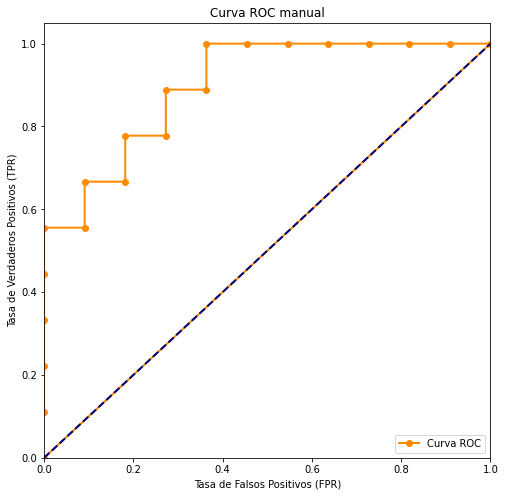

In [7]:
df = pd.DataFrame(
    [[1, .99], #Si el punto de corte es aca, entonces y_pred [1,0,0,0,0,0,0,0,0...,0]
     [1, .94], #Si el punto de corte es aca, entonces y_pred [1,1,0,0,0,0,0,0,0...,0]
     [1, .89], #Si el punto de corte es aca, entonces y_pred [1,1,1,0,0,0,0,0,0...,0]
     [1, .84],
     [1, .79],
     [0, .74],
     [1, .69],
     [0, .64],
     [1, .58],
     [0, .54],
     [1, .49],
     [0, .44],
     [1, .39],
     [0, .34],
     [0, .29],
     [0, .24],
     [0, .19],
     [0, .14],
     [0, .09],
     [0, .03]],     
    columns=['y_test', 'y_pred_prob']
)
fpr_list, tpr_list = manual_roc_curve(df['y_test'], df['y_pred_prob'])


In [34]:
#tpr_list, fpr_list

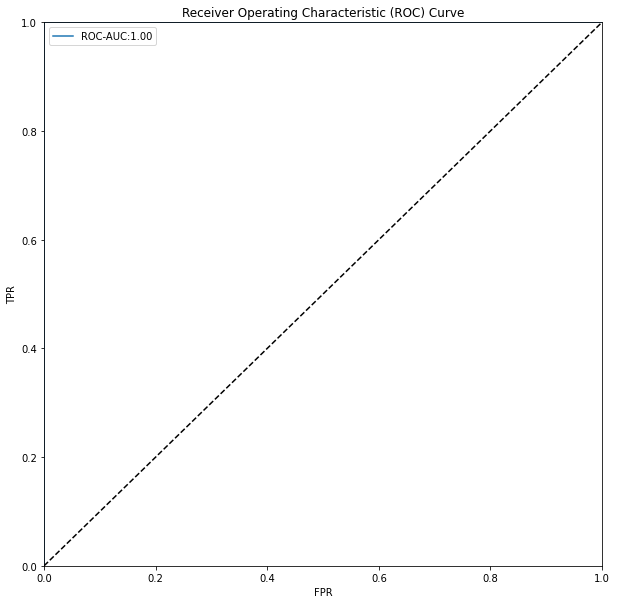

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
plt.figure(figsize=(10, 10))
fpr, tpr, _ = roc_curve(df['y_test'], df['y_pred_prob'])
auc_val = auc(fpr, tpr)
plt.plot(fpr, tpr, label="ROC-AUC:{:.2f}".format(auc_val))


plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()